PyTorch IRIS Accuracy: 1.0
PyTorch IRIS Loss: 0.3234853446483612


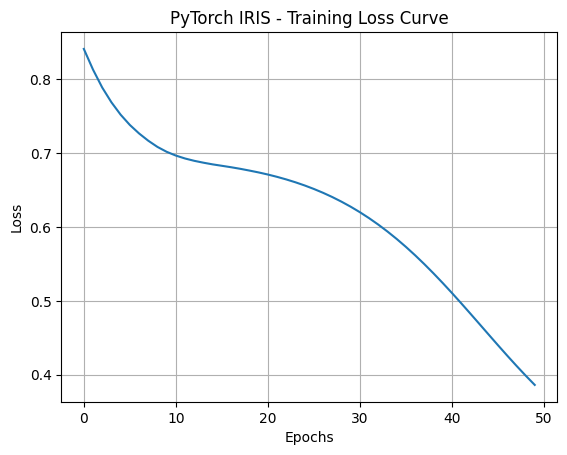

In [1]:
# ----------------------------------------------------------
# PYTORCH – IRIS Binary Classification (Accuracy + Loss + Graph)
# ----------------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binary classes
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test  = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

# Build model
class IrisNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 8)
        self.fc2 = nn.Linear(8, 4)
        self.fc3 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = IrisNet()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_list = []

# Train
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

# Test
with torch.no_grad():
    preds = (model(X_test) > 0.5).float()
    accuracy = (preds.eq(y_test).sum() / len(y_test)).item()
    test_loss = criterion(model(X_test), y_test).item()

print("PyTorch IRIS Accuracy:", accuracy)
print("PyTorch IRIS Loss:", test_loss)

# Plot loss graph
plt.plot(loss_list)
plt.title("PyTorch IRIS - Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
